<a href="https://colab.research.google.com/github/sukkyun2/big-data-visualization-and-analysis/blob/main/07.Data%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification : Top Hits Spotify from 2000-2019

## Loading Libraries

In [ ]:
import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings # 경고무시
warnings.filterwarnings('ignore')

## Load Dataset

In [ ]:
path = kagglehub.dataset_download("paradisejoy/top-hits-spotify-from-20002019")
path

100%|██████████| 93.7k/93.7k [00:00<00:00, 16.4MB/s]

Extracting files...


'/root/.cache/kagglehub/datasets/paradisejoy/top-hits-spotify-from-20002019/versions/4'

In [ ]:
df = pd.read_csv(os.path.join(path, "songs_normalize.csv"))
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


## Data Visualization

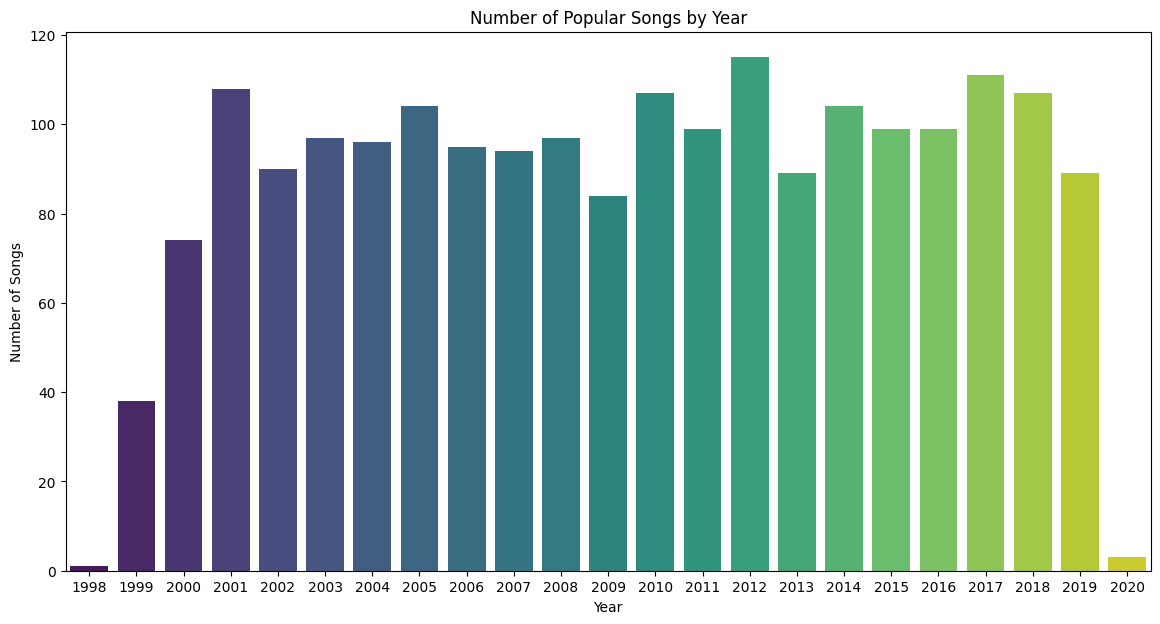

In [ ]:
plt.figure(figsize=(14, 7))
sns.countplot(x='year', data=df, palette='viridis')
plt.title('Number of Popular Songs by Year')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.show()

## Exploratory Data Analysis

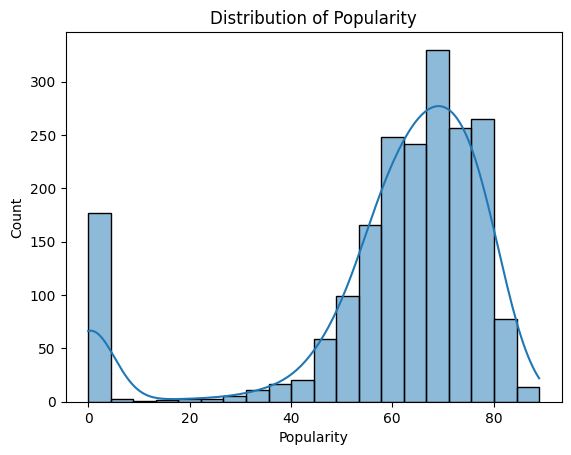

In [ ]:
sns.histplot(df['popularity'], bins=20, kde=True)
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.show()

## Splitting into training and testing datasets

In [ ]:
X = df[['duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
          'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
y = df['genre'].apply(lambda x: x.split(',')[0])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training model

In [ ]:
scaler = StandardScaler()

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# KNN Training
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Naive Bayes Training
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# SVM Training
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

## Checking Out Accuracy

In [ ]:
y_pred_knn = knn_model.predict(X_test)
y_pred_nb = nb_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)

print('KNN Accuracy:', accuracy_score(y_test, y_pred_knn))
print('Naive Bayes Accuracy:', accuracy_score(y_test, y_pred_nb))
print('SVM Accuracy:', accuracy_score(y_test, y_pred_svm))

KNN Accuracy: 0.58
Naive Bayes Accuracy: 0.38
SVM Accuracy: 0.6175


## Improving Accuracy

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(SVC(), param_grid, cv=3)
grid_search.fit(X_train, y_train)

best_svm_model = grid_search.best_estimator_
print('Best SVM Accuracy after tuning:', best_svm_model.score(X_test, y_test))

Best SVM Accuracy after tuning: 0.6175


## Compare accuracy of three algorithms: KNN, NB, SVM


In [ ]:
def print_classification_metrics(y_true, y_pred, model_name):
    print(f"--- {model_name} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:")
    print(classification_report(y_true, y_pred))
    print("\n")

# 각 모델의 성능 평가 출력
print_classification_metrics(y_test, y_pred_knn, "KNN")
print_classification_metrics(y_test, y_pred_nb, "Naive Bayes")
print_classification_metrics(y_test, y_pred_svm, "SVM")


--- KNN ---
Accuracy: 0.58
Classification Report:
                   precision    recall  f1-score   support

 Dance/Electronic       0.00      0.00      0.00         7
    Folk/Acoustic       0.00      0.00      0.00         2
              R&B       0.00      0.00      0.00         2
World/Traditional       0.00      0.00      0.00         1
          country       0.00      0.00      0.00         2
   easy listening       0.00      0.00      0.00         1
          hip hop       0.65      0.65      0.65       161
            latin       0.00      0.00      0.00         1
            metal       0.00      0.00      0.00         2
              pop       0.55      0.71      0.62       178
             rock       0.67      0.05      0.09        41
            set()       0.00      0.00      0.00         2

         accuracy                           0.58       400
        macro avg       0.15      0.12      0.11       400
     weighted avg       0.57      0.58      0.54       400



-